In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Input:
df = pd.read_csv("Metazygia monitor 1.csv")
min_day=1440
total_time = len(df.index)
num_days = total_time//min_day
column=df.columns[2:]

In [2]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

In [3]:
#Determine when lights are on and off so it can be plotted on the raster plots
def plot_night(df): 
    for time in range(1, len(df.index)):
        global start1
        global end1
        global start2
        global end2
        if df.lights[time] == 1: 
            lights_on = True
        else:
            lights_on = False
        #determine when lights are off initially (0:00:00)
        if lights_on == False and time-1==0:
            start1 = time
        #determine if the lights are on and they were off previously
        if lights_on == True and df.lights[time-1] == 0:
            end1 = time+1
        #For the LD cycle, when do the lights turn off again
        if lights_on==False and df.lights[time-1] == 1:
            start2 = time
        #For the LD cycle, when does the day end
        if lights_on==False and time==( len(df.index)-2):
            end2= time

In [4]:
#Plot activity in subplots
#Imput:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y): 
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        ax[i].plot(df['time'][min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        df1=df1.reset_index()
        #Make DD plots all grey
        if np.mean(df1.lights)==0:
            ax[i].axvspan(0,min_day, alpha=.5,color='grey')
        #Run function to determine when lights are off during LD cycle
        else:
            plot_night(df1)
            ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
            ax[i].axvspan(start2, end2,alpha=0.5, color='grey')

In [5]:
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df):
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time[["day", "time"]] = df_time["Date_Time"].str.split(" ", expand = True)
    
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(0, len(column)):
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
        fig.suptitle(column[spider], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y)
        #plot x axis
        ax[num_days-1].set_xticks(range(0, min_day, 360)) 
        plt.xlabel('Time')
        #save figure
        #fig.savefig(column[spider] +'raster.jpg')
        plt.show()
        print('Next spider')

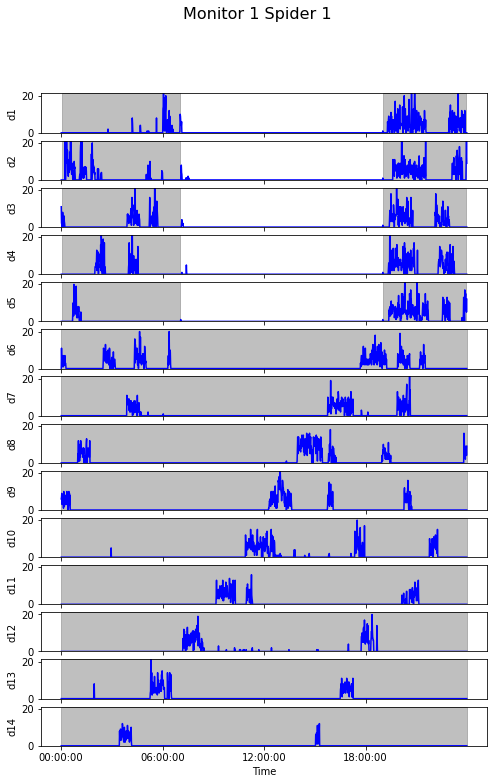

Next spider


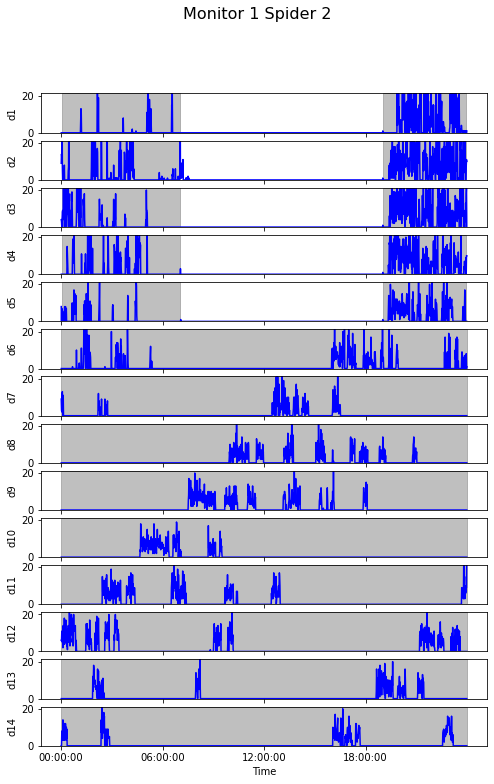

Next spider


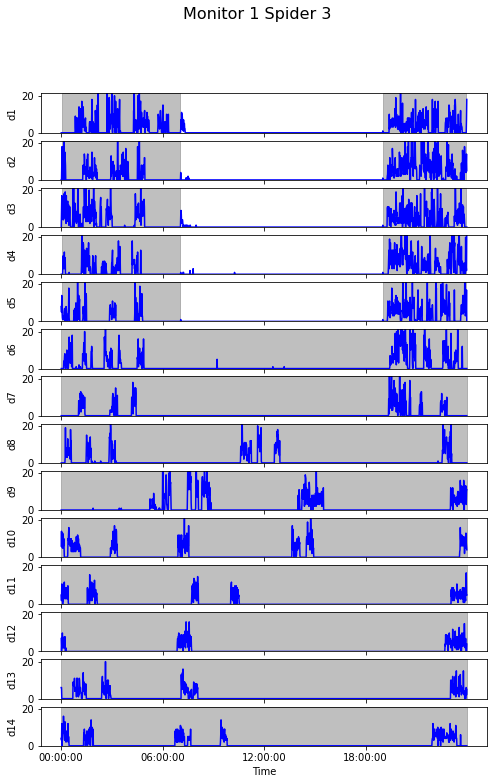

Next spider


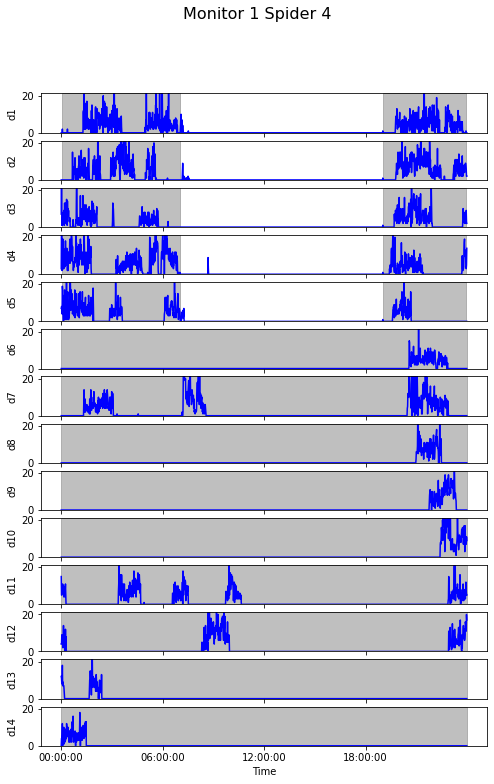

Next spider


KeyboardInterrupt: 

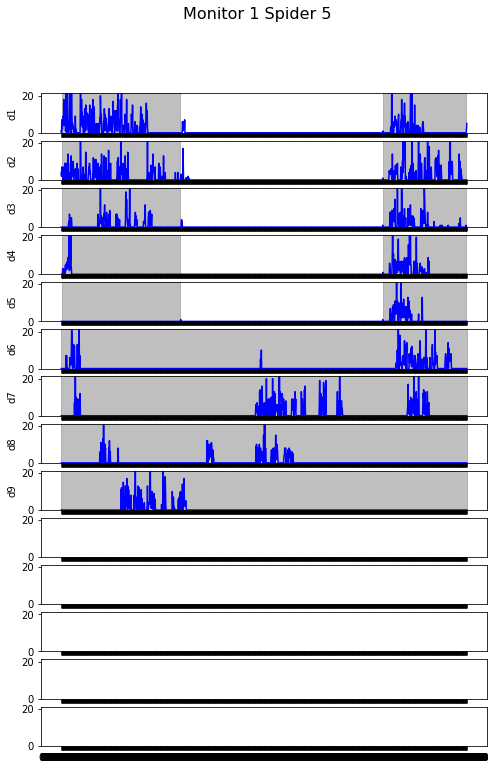

In [6]:
spider_raster(df)